## Runge Kutta Exercises

In this notebook I will be exploring first, second, and fourth order Runge Kutta algorithms for solving differential equations. I will be basing the code and examples on [this](https://lpsa.swarthmore.edu/NumInt/NumIntIntro.html). It is mostly for my learning benefit.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd

Start with the equation: 

\begin{align*}
\dot{y}(t)=-2y(t)
\end{align*}

This has a solution $y(t) = 3e^{-2t}, t \geq 0$.

Here, the approximation for the derivative $\dot{y}(t) = -2y(t)$ would be $k_1 = -2y^*(h)$, where $y^*$ is the approximation for $y$ and $h$ is the time step between the previous value of $y^*$ and the next one.

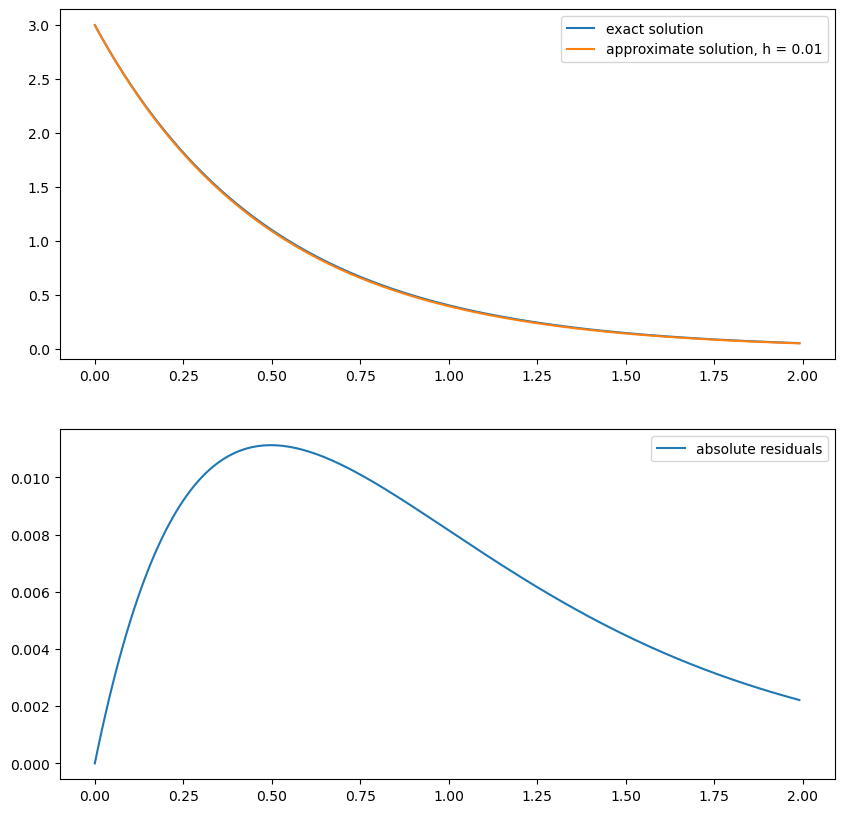

Average Error:  0.0068414054414902715


In [30]:
# solve y' = -2y
y0 = 3 #initial condition
h = 0.01 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec
yexact = 3*np.exp(-2*t) #exact solution for the equation
ystar = np.zeros(len(t)) #empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = -2*ystar[i]
    ystar[i+1] = ystar[i] + k1*h

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

Note above that the average error is of order h, as predicted by the theory.

Now I will consider the same equation with an input: 

\begin{align*}
\dot{y}(t) = \cos(4t) - 2y(t)
\end{align*}

This has an exact solution: $y(t) = 2.9e^{-2t} + 0.1\cos(4t) + 0.2\sin(4t)$.

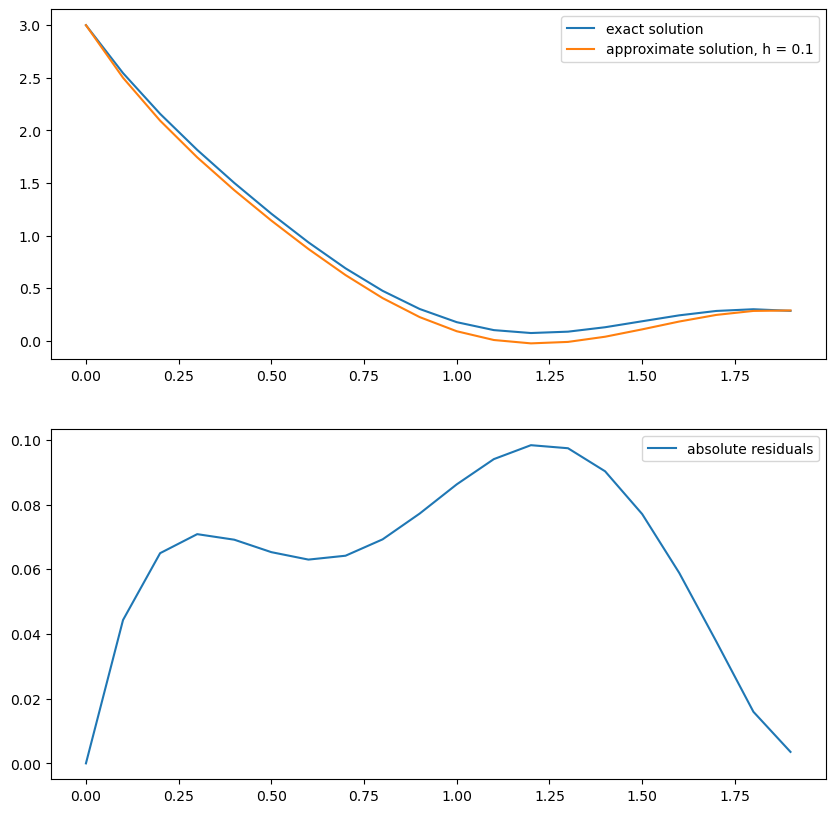

Average Error:  0.0623714175507288


In [32]:
# solve y' = -2y
y0 = 3 #initial condition
h = 0.1 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec

#exact solution for the equation:
yexact = 2.9*np.exp(-2*t) + 0.1*np.cos(4*t)  + 0.2*np.sin(4*t)

ystar = np.zeros(len(t)) #preallocated empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = -2*ystar[i] + np.cos(4*t[i]) #derivative approximation
    ystar[i+1] = ystar[i] + k1*h #subsequent step based on approx

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

A third example: 

\begin{align*}
\dot{y}(t)-y(t)(1-2t) = 0, y(0) = 1
\end{align*}

This has solution $y(t) = e^{t-t^2}$. For the algorithm, 

\begin{align*}
\dot{y}(t_0) &= y(t_0)(1-2t_0) \\
k_1 &= y^*(t_0)(1-2t_0)\\
y^*(t_0+h) &= y^*(t_0)+k_1h
\end{align*}

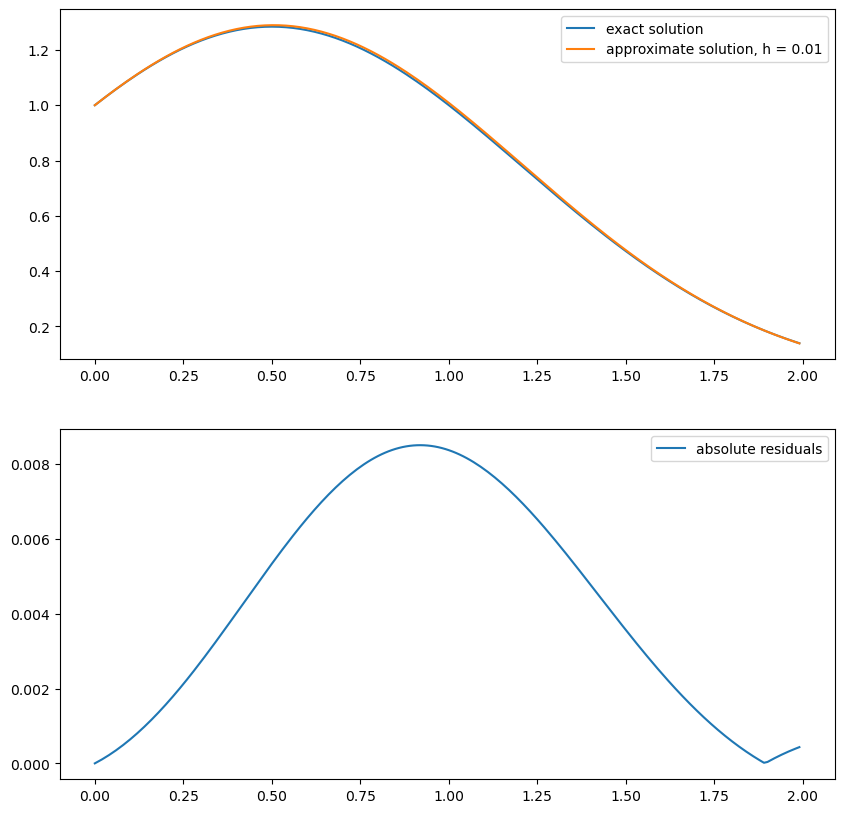

Average Error:  0.004368300246037844


In [34]:
# solve y' = -2y
y0 = 1 #initial condition
h = 0.01 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec

#exact solution for the equation:
yexact = np.exp(t-t**2)

ystar = np.zeros(len(t)) #preallocated empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = ystar[i]*(1-2*t[i])#derivative approximation
    ystar[i+1] = ystar[i] + k1*h #subsequent step based on approx

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

## Higher order equations

For higher order ODE, we'll work with the problem as a matrix differential equation. Consider the example:

\begin{align*}
\dddot{y}(t) + 4\ddot{y}(t) + 6\dot{y}(t) &= \gamma(t), \gamma(t) \text{ is the unit step function} \\
\ddot{y}(0^+) &= 0, \\
\dot{y}(0^+) &= -1 \\
y(0^+) &= 0
\end{align*}

We can let the state vector

\begin{align*}
\mathbf{q}(t) = 

\begin{bmatrix}
q_1(t) \\
q_2(t) \\
q_3(t) 
\end{bmatrix} 
= 
\begin{bmatrix}
y(t) \\
\dot{y}(t) \\
\ddot{y}(t) 
\end{bmatrix} 
\end{align*}

From this, we can find $\dot{\mathbf{q}}(t)$:

\begin{align*}
\dot{\mathbf{q}}(t) = 
\begin{bmatrix}
\dot{q_1}(t) \\
\dot{q_2}(t) \\
\dot{q_3}(t)
\end{bmatrix}
 = 
 \begin{bmatrix}
\dot{y}(t) \\
\ddot{y}(t) \\
\dddot{y}(t)
\end{bmatrix} 
= 
\begin{bmatrix}
q_2(t) \\
q_3(t) \\
\gamma(t) - 4q_3(t) - 6q_2(t) - 4q_1(t)
\end{bmatrix}
\end{align*}

Defining 

\begin{align*}
\mathbf{A} = 
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
-4 & -6 & -4
\end{bmatrix}, 

\mathbf{B} = 
\begin{bmatrix}
0 \\
0 \\ 
1
\end{bmatrix}
\end{align*}

We find

\begin{align*}
\dot{\mathbf{q}}(t) = \mathbf{A}\mathbf{q}(t) + \mathbf{B}\gamma(t)
\end{align*}

From this, we can now approximate the derivative of the vector $\mathbf{q}$ as 

\begin{align*}
\mathbf{k}_1 = \mathbf{A}\mathbf{q}^*(t_0) + \mathbf{B}\gamma{t_0}
\end{align*}


[ 0.         -0.05       -0.1        -0.149125   -0.19665    -0.24198313
 -0.28465031 -0.32428143 -0.36059769 -0.39340027 -0.42256002 -0.44800818
 -0.46972796 -0.48774704 -0.50213075 -0.51297603 -0.52040592 -0.52456476
 -0.52561383 -0.52372749 -0.51908981 -0.51189153 -0.5023275  -0.49059427
 -0.47688822 -0.46140373 -0.44433179 -0.42585871 -0.40616509 -0.38542499
 -0.36380515 -0.34146456 -0.31855395 -0.29521553 -0.27158278 -0.24778038
 -0.22392413 -0.20012106 -0.17646947 -0.15305916 -0.12997158 -0.10728011
 -0.08505031 -0.06334023 -0.04220073 -0.02167583 -0.00180303  0.01738633
  0.03586666  0.05361785  0.07062482  0.08687721  0.10236903  0.11709829
  0.13106669  0.14427927  0.15674413  0.16847209  0.17947641  0.18977253
  0.19937779  0.20831119  0.21659312  0.2242452   0.23129001  0.23775092
  0.24365192  0.24901744  0.25387217  0.25824097  0.2621487   0.2656201
  0.2686797   0.27135171  0.27365995  0.27562776  0.27727791  0.2786326
  0.27971335  0.28054099  0.28113561  0.28151654  0.2

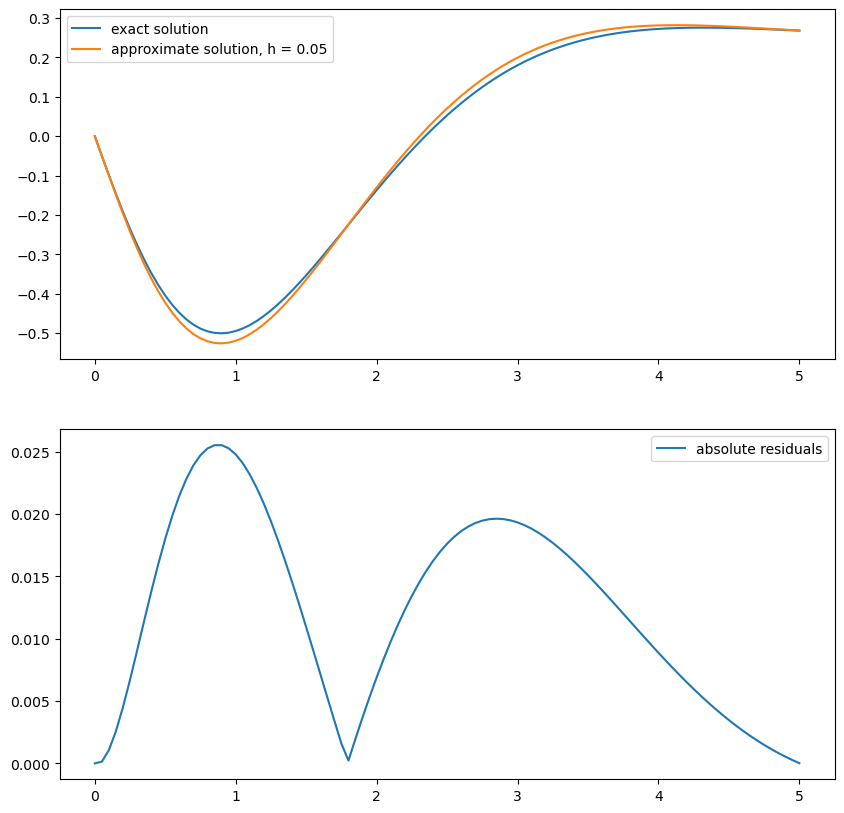

0.012264105600423552

In [19]:
# solve y' = -2y
q0 = np.array([0, 
               -1, 
               0]) #initial condition
h = 0.05 #time step
t = np.arange(0, 5+h, step=h) #t from 0 to 2 sec

#exact solution for the equation for t>=0:
yexact = (1/4) + np.exp(-t)*(np.cos(t) - (5/2)*np.sin(t)) -(5/4)*np.exp(-2*t)

A = np.array([[0, 1, 0], 
              [0, 0, 1], 
              [-4, -6, -4]])
B = np.array([0, 
             0, 
             1])

qstar = np.zeros((3, len(t))) #preallocated empty array for manipulating

qstar[:, 0] = q0 #initial condition for the array, will set subsequent steps
for i in range(len(t)-1):
    k1 = A @ qstar[:, i] + B*1#derivative approximation
    qstar[:, i+1] = qstar[:, i] + k1 * h #subsequent step based on approx
print(qstar[0])
residuals = qstar[0,:] - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, qstar[0,:], label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
meanDeviation

Now I will repeat the examples, but using a fourth order Runge Kutta. 

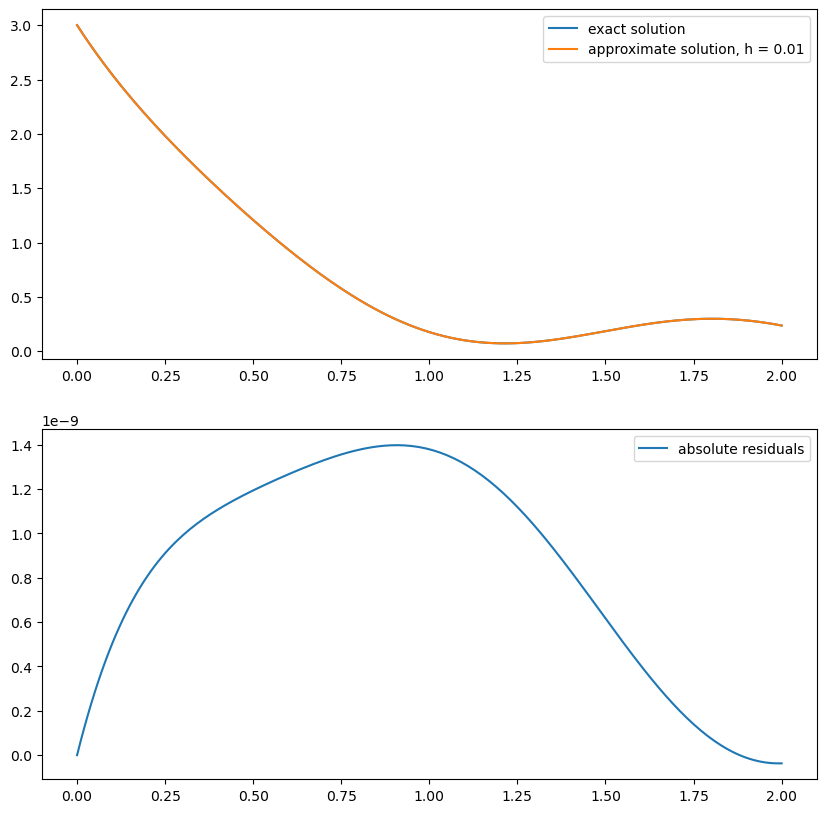

Average Error:  8.486075888426475e-10


In [24]:
# solve y' = -2y
y0 = 3 #initial condition
h = 0.01 #time step
t = np.arange(start=0, stop=2+h, step=h) #t from 0 to 2 sec

#exact solution for the equation:
yexact = 2.9*np.exp(-2*t) + 0.1*np.cos(4*t)  + 0.2*np.sin(4*t)

ystar = np.zeros(len(t)) #preallocated empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = -2*ystar[i] + np.cos(4*t[i]) #derivative approximation
    y1 = ystar[i] + k1*h/2
    
    k2 = -2*y1 + np.cos(4*(t[i]+h/2))
    y2 = ystar[i] + k2*h/2 

    k3 = -2*y2 + np.cos(4*(t[i]+h/2))
    y3 = ystar[i] + k3*h

    k4 = -2*y3 + np.cos(4*(t[i]+h))
    ystar[i+1] = ystar[i] + (k1+2*k2+2*k3+k4)*h/6 #subsequent step based on approx

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

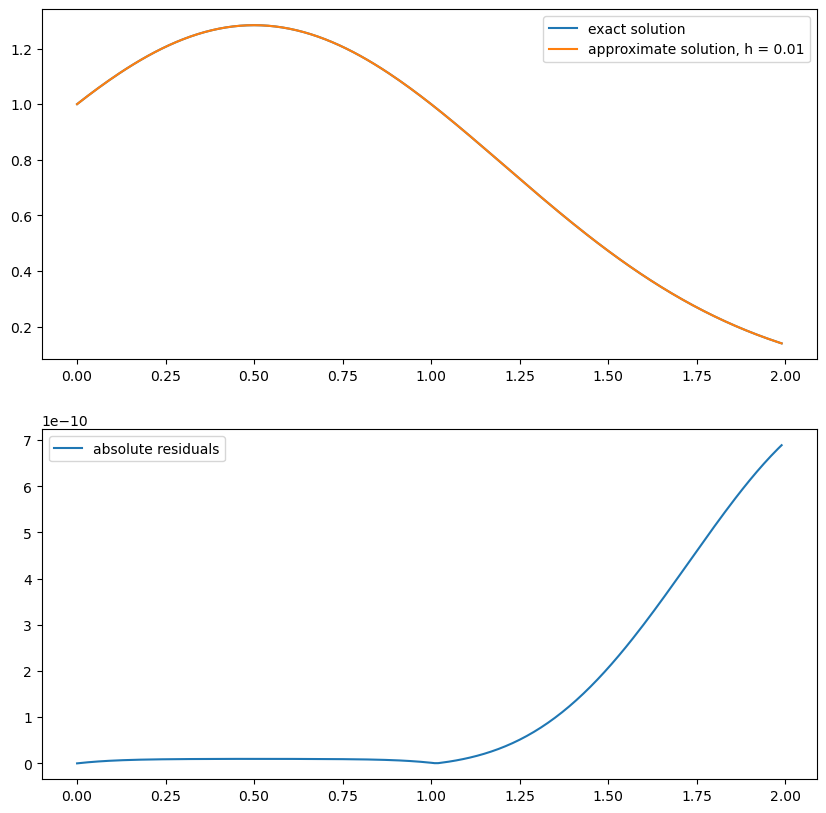

Average Error:  1.3366812115500616e-10


In [26]:
# solve y' = -2y
y0 = 1 #initial condition
h = 0.01 #time step
t = np.arange(start=0, stop=2, step=h) #t from 0 to 2 sec

#exact solution for the equation:
yexact = np.exp(t-t**2)

ystar = np.zeros(len(t)) #preallocated empty array for manipulating

ystar[0] = y0 #initial condition for the array, will set subsequent steps

for i in range(len(t)-1):
    k1 = ystar[i]*(1-2*t[i]) #derivative approximation
    y1 = ystar[i] + k1*h/2
    
    k2 = y1*(1-2*(t[i]+h/2)) 
    y2 = ystar[i] + k2*h/2 

    k3 = y2*(1-2*(t[i]+h/2))
    y3 = ystar[i] + k3*h

    k4 = y3*(1-2*(t[i]+h))
    ystar[i+1] = ystar[i] + (k1+2*k2+2*k3+k4)*h/6 #subsequent step based on approx

residuals = ystar - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, ystar, label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
print("Average Error: ", meanDeviation)

[ 0.         -0.04986042 -0.09892922 -0.14653645 -0.19213156 -0.23527004
 -0.27560127 -0.31285742 -0.34684343 -0.3774279  -0.40453487 -0.42813631
 -0.44824544 -0.46491062 -0.47820994 -0.48824624 -0.4951428  -0.49903937
 -0.50008867 -0.49845332 -0.49430305 -0.48781231 -0.47915812 -0.46851825
 -0.45606958 -0.44198671 -0.42644083 -0.40959865 -0.39162161 -0.3726652
 -0.35287836 -0.33240311 -0.31137416 -0.28991874 -0.26815642 -0.24619903
 -0.22415071 -0.20210787 -0.18015938 -0.15838666 -0.13686388 -0.11565818
 -0.09482987 -0.07443272 -0.05451424 -0.03511592 -0.0162736   0.00198232
  0.0196265   0.03663837  0.05300186  0.06870504  0.0837399   0.09810195
  0.11179005  0.12480605  0.13715456  0.14884268  0.15987975  0.17027713
  0.18004796  0.18920694  0.19777013  0.20575477  0.21317909  0.22006214
  0.22642364  0.2322838   0.23766324  0.24258281  0.2470635   0.25112635
  0.2547923   0.25808216  0.2610165   0.26361556  0.26589924  0.26788701
  0.26959785  0.27105024  0.27226209  0.27325074  0.

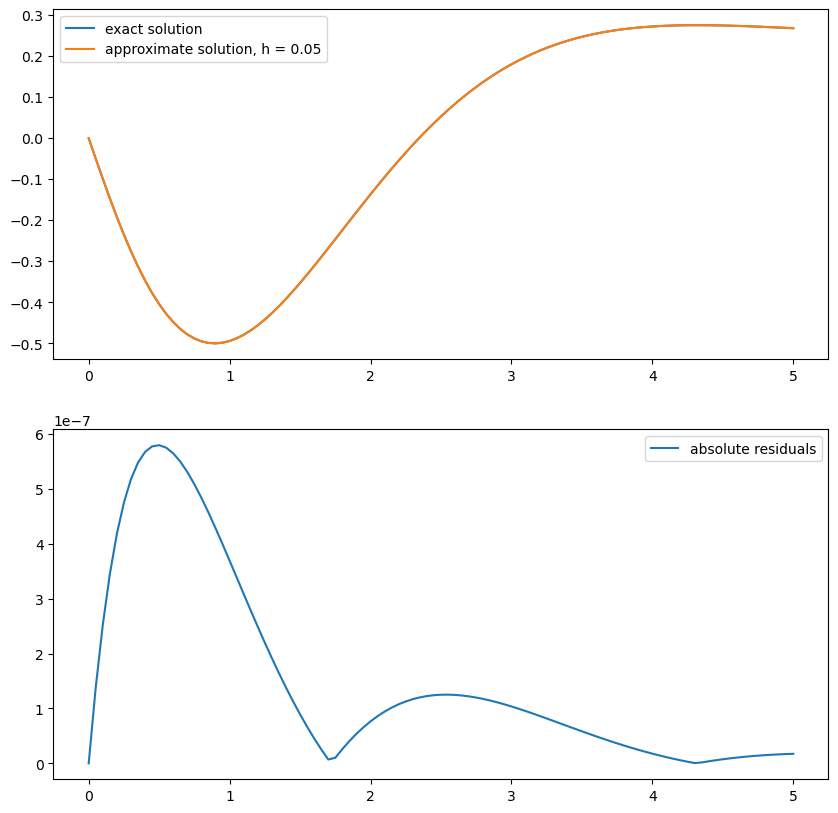

1.5265529394941188e-07

In [31]:
# solve y' = -2y
q0 = np.array([0, 
               -1, 
               0]) #initial condition
h = 0.05 #time step
t = np.arange(0, 5+h, step=h) #t from 0 to 2 sec

#exact solution for the equation for t>=0:
yexact = (1/4) + np.exp(-t)*(np.cos(t) - (5/2)*np.sin(t)) -(5/4)*np.exp(-2*t)

A = np.array([[0, 1, 0], 
              [0, 0, 1], 
              [-4, -6, -4]])
B = np.array([0, 
             0, 
             1])

qstar = np.zeros((3, len(t))) #preallocated empty array for manipulating

qstar[:, 0] = q0 #initial condition for the array, will set subsequent steps
for i in range(len(t)-1):
    k1 = A @ qstar[:, i] + B*1#derivative approximation
    y1 = qstar[:, i] + k1*h/2

    k2 = A @ y1 + B*1
    y2 = qstar[:, i] + k2*h/2

    k3 = A @ y2 + B*1
    y3 = qstar[:, i] + k3*h

    k4 = A @ y3 + B*1
    qstar[:, i+1] = qstar[:, i] + (k1+2*k2+2*k3+k4) * h/6 #subsequent step based on approx
    


print(qstar[0])
residuals = qstar[0,:] - yexact #determine error
sqResiduals = np.sqrt(residuals**2) #absolute deviation

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(t, yexact, label='exact solution')
ax[0].plot(t, qstar[0,:], label='approximate solution, h = {}'.format(str(h)))

ax[1].plot(t, sqResiduals, label='absolute residuals')

for a in ax:
    a.legend()

plt.show()

meanDeviation = np.sum(sqResiduals)/len(t) #average error
meanDeviation